This demo is to use KERAS CNN for digit recognition. It combines the key components from the below two tuturials. 

https://towardsdatascience.com/a-simple-2d-cnn-for-mnist-digit-recognition-a998dbc1e79a
https://elitedatascience.com/keras-tutorial-deep-learning-in-python

As none of the two tuturials run successfully on my laptop, I have slightly changed a few things to make it work.

To be able to run successfully, you will need to install below:
1. Python 3.6 (Please use the latest version of Anaconda for Python 3.6)
2. Install Tensflow and Keras

# Import related libraries

In [1]:
# import libraries and modules

import numpy as np #NumPy
np.random.seed(123)  # for reproducibility
from keras.models import Sequential #Keras model modules
from keras.layers import Dense, Dropout, Activation, Flatten # core layers
from keras.layers import Convolution2D, MaxPooling2D # CNN layers
from keras.utils import np_utils # Utilities
from keras.layers.convolutional import Convolution2D

Using TensorFlow backend.


# Prepare data

In [2]:
# Load MNIST data
from keras.datasets import mnist
# there are a few places to store MNIST data, I think from KERAS is the easiest one

In [3]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.ndim) # show dimensions

3


In [5]:
print (X_train.shape) # 28*28 pixels

(60000, 28, 28)


In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])


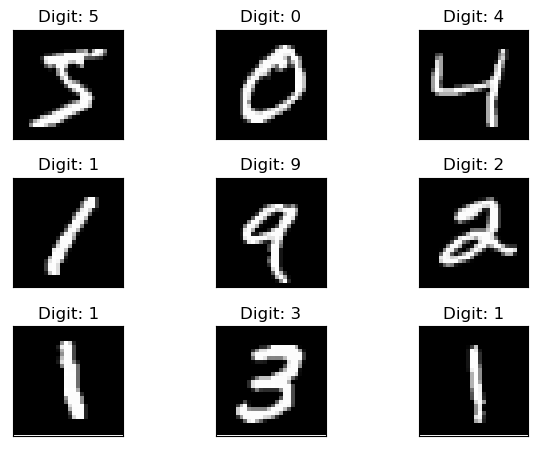

In [7]:
fig

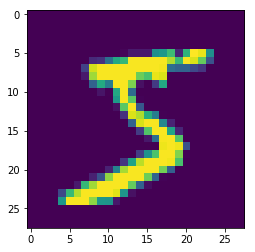

In [8]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

In [14]:
#Reshape input data
X_train_reshape = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test_reshape = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [15]:
print (X_train_reshape.shape)

(60000, 1, 28, 28)


In [16]:
#Convert data type and normalize values
X_train_reshape = X_train_reshape.astype('float32')
X_test_reshape = X_test_reshape.astype('float32')
X_train_reshape /= 255
X_test_reshape /= 255

In [17]:
print (X_train_reshape.shape)

(60000, 1, 28, 28)


In [18]:
print (y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [19]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train_1d = np_utils.to_categorical(y_train, 10)
Y_test_1d = np_utils.to_categorical(y_test, 10)

In [22]:
print (Y_train_1d.shape)

(60000, 10)


# Build the model

In [23]:
# Define model architecture
# Declare sequential model
model = Sequential()

In [24]:
# CNN Input layer
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28), data_format='channels_first'))

In [25]:
print (model.output_shape)

(None, 32, 26, 26)


In [26]:
model.add(Convolution2D(32, (3, 3), activation='relu',data_format='channels_first'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [27]:
# fully connected dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [28]:
# compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model

In [53]:
# FIt CNN Model
model.fit(X_train_reshape, Y_train_1d, 
          batch_size=32, nb_epoch=4, verbose=1) 
## batch_size = 32
## nb_epoch = 10
## verbose = 1

Epoch 1/4
   64/60000 [..............................] - ETA: 2:57 - loss: 0.1413 - acc: 0.9531

C:\Users\fenli\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


60000/60000 [==============================] - 165s 3ms/step - loss: 0.0922 - acc: 0.9728
Epoch 2/4
60000/60000 [==============================] - 167s 3ms/step - loss: 0.0700 - acc: 0.9787
Epoch 3/4
60000/60000 [==============================] - 169s 3ms/step - loss: 0.0613 - acc: 0.9806
Epoch 4/4
60000/60000 [==============================] - 180s 3ms/step - loss: 0.0504 - acc: 0.9844


# Evaluate the model

In [54]:
# Evaluate CNN Model
score = model.evaluate(X_test_reshape, Y_test_1d, verbose=0)

In [55]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03224206328773707
Test accuracy: 0.9908


# Model prediction

In [56]:
# Prediction
Y = model.predict(X_test_reshape)

### Show a few examples

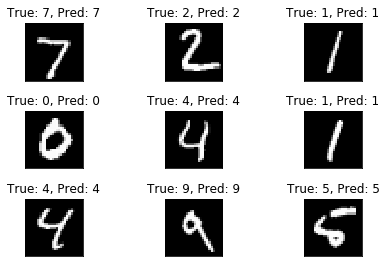

In [57]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_test[i], cmap='gray', interpolation='none')
  #plt.title("Digit: {}".format(np.argmax(Y[i])))
  plt.title("True: {0}, Pred: {1}".format(y_test[i],np.argmax(Y[i])))
  plt.xticks([])
  plt.yticks([])

### Examples that the model get them wrong

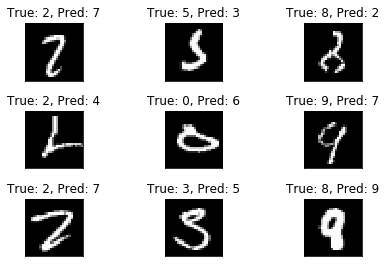

In [58]:
fal_list =list()
for i in range(len(X_test_reshape)):
    if y_test[i] != np.argmax(Y[i]):
        fal_list.append(i)
        
fig = plt.figure()
for i in range(9):
  j = fal_list[i]
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_test[j], cmap='gray', interpolation='none')
  #plt.title("Digit: {}".format(np.argmax(Y[i])))
  plt.title("True: {0}, Pred: {1}".format(y_test[j],np.argmax(Y[j])))
  plt.xticks([])
  plt.yticks([])